In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import os
import pandas as pd

# Try local path first, else fallback to Kaggle input path
local_path = "loan_approved.csv"
kaggle_path = "/kaggle/input/loan-approved-dataset/loan_approved.csv"

if os.path.exists(local_path):
    df = pd.read_csv(local_path)
    print("Loaded dataset from local file system.")
elif os.path.exists(kaggle_path):
    df = pd.read_csv(kaggle_path)
    print("Loaded dataset from Kaggle input directory.")
else:
    raise FileNotFoundError("Dataset not found in local path or Kaggle input path.")

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
print(f'shape of data is : {df.shape}')
print(f'\nsum of dupilicated values is: {df.duplicated().sum()}')
print(f'\nnull values in data is : {df.isnull().sum()}')
print(f'\nlen columns is : {len(df.columns)}\nlist of columns in data is :\n{df.columns.to_list()}\n')
print(f'info of data is :{df.info()}')

shape of data is : (614, 13)

sum of dupilicated values is: 0

null values in data is : Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

len columns is : 13
list of columns in data is :
['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status (Approved)']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    obj

In [4]:
# dropping unwanted columns
df = df.drop(columns='Loan_ID')

In [5]:
# handling the missing values
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])

In [6]:
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])

In [7]:
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [8]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])

In [9]:
# handling null values in numarical columns
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].dropna().median())

In [10]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].dropna().mean())

In [11]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].dropna().mode()[0])

In [12]:
df.isnull().sum()

Gender                    0
Married                   0
Dependents                0
Education                 0
Self_Employed             0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status (Approved)    0
dtype: int64

In [13]:
df = df.drop_duplicates()

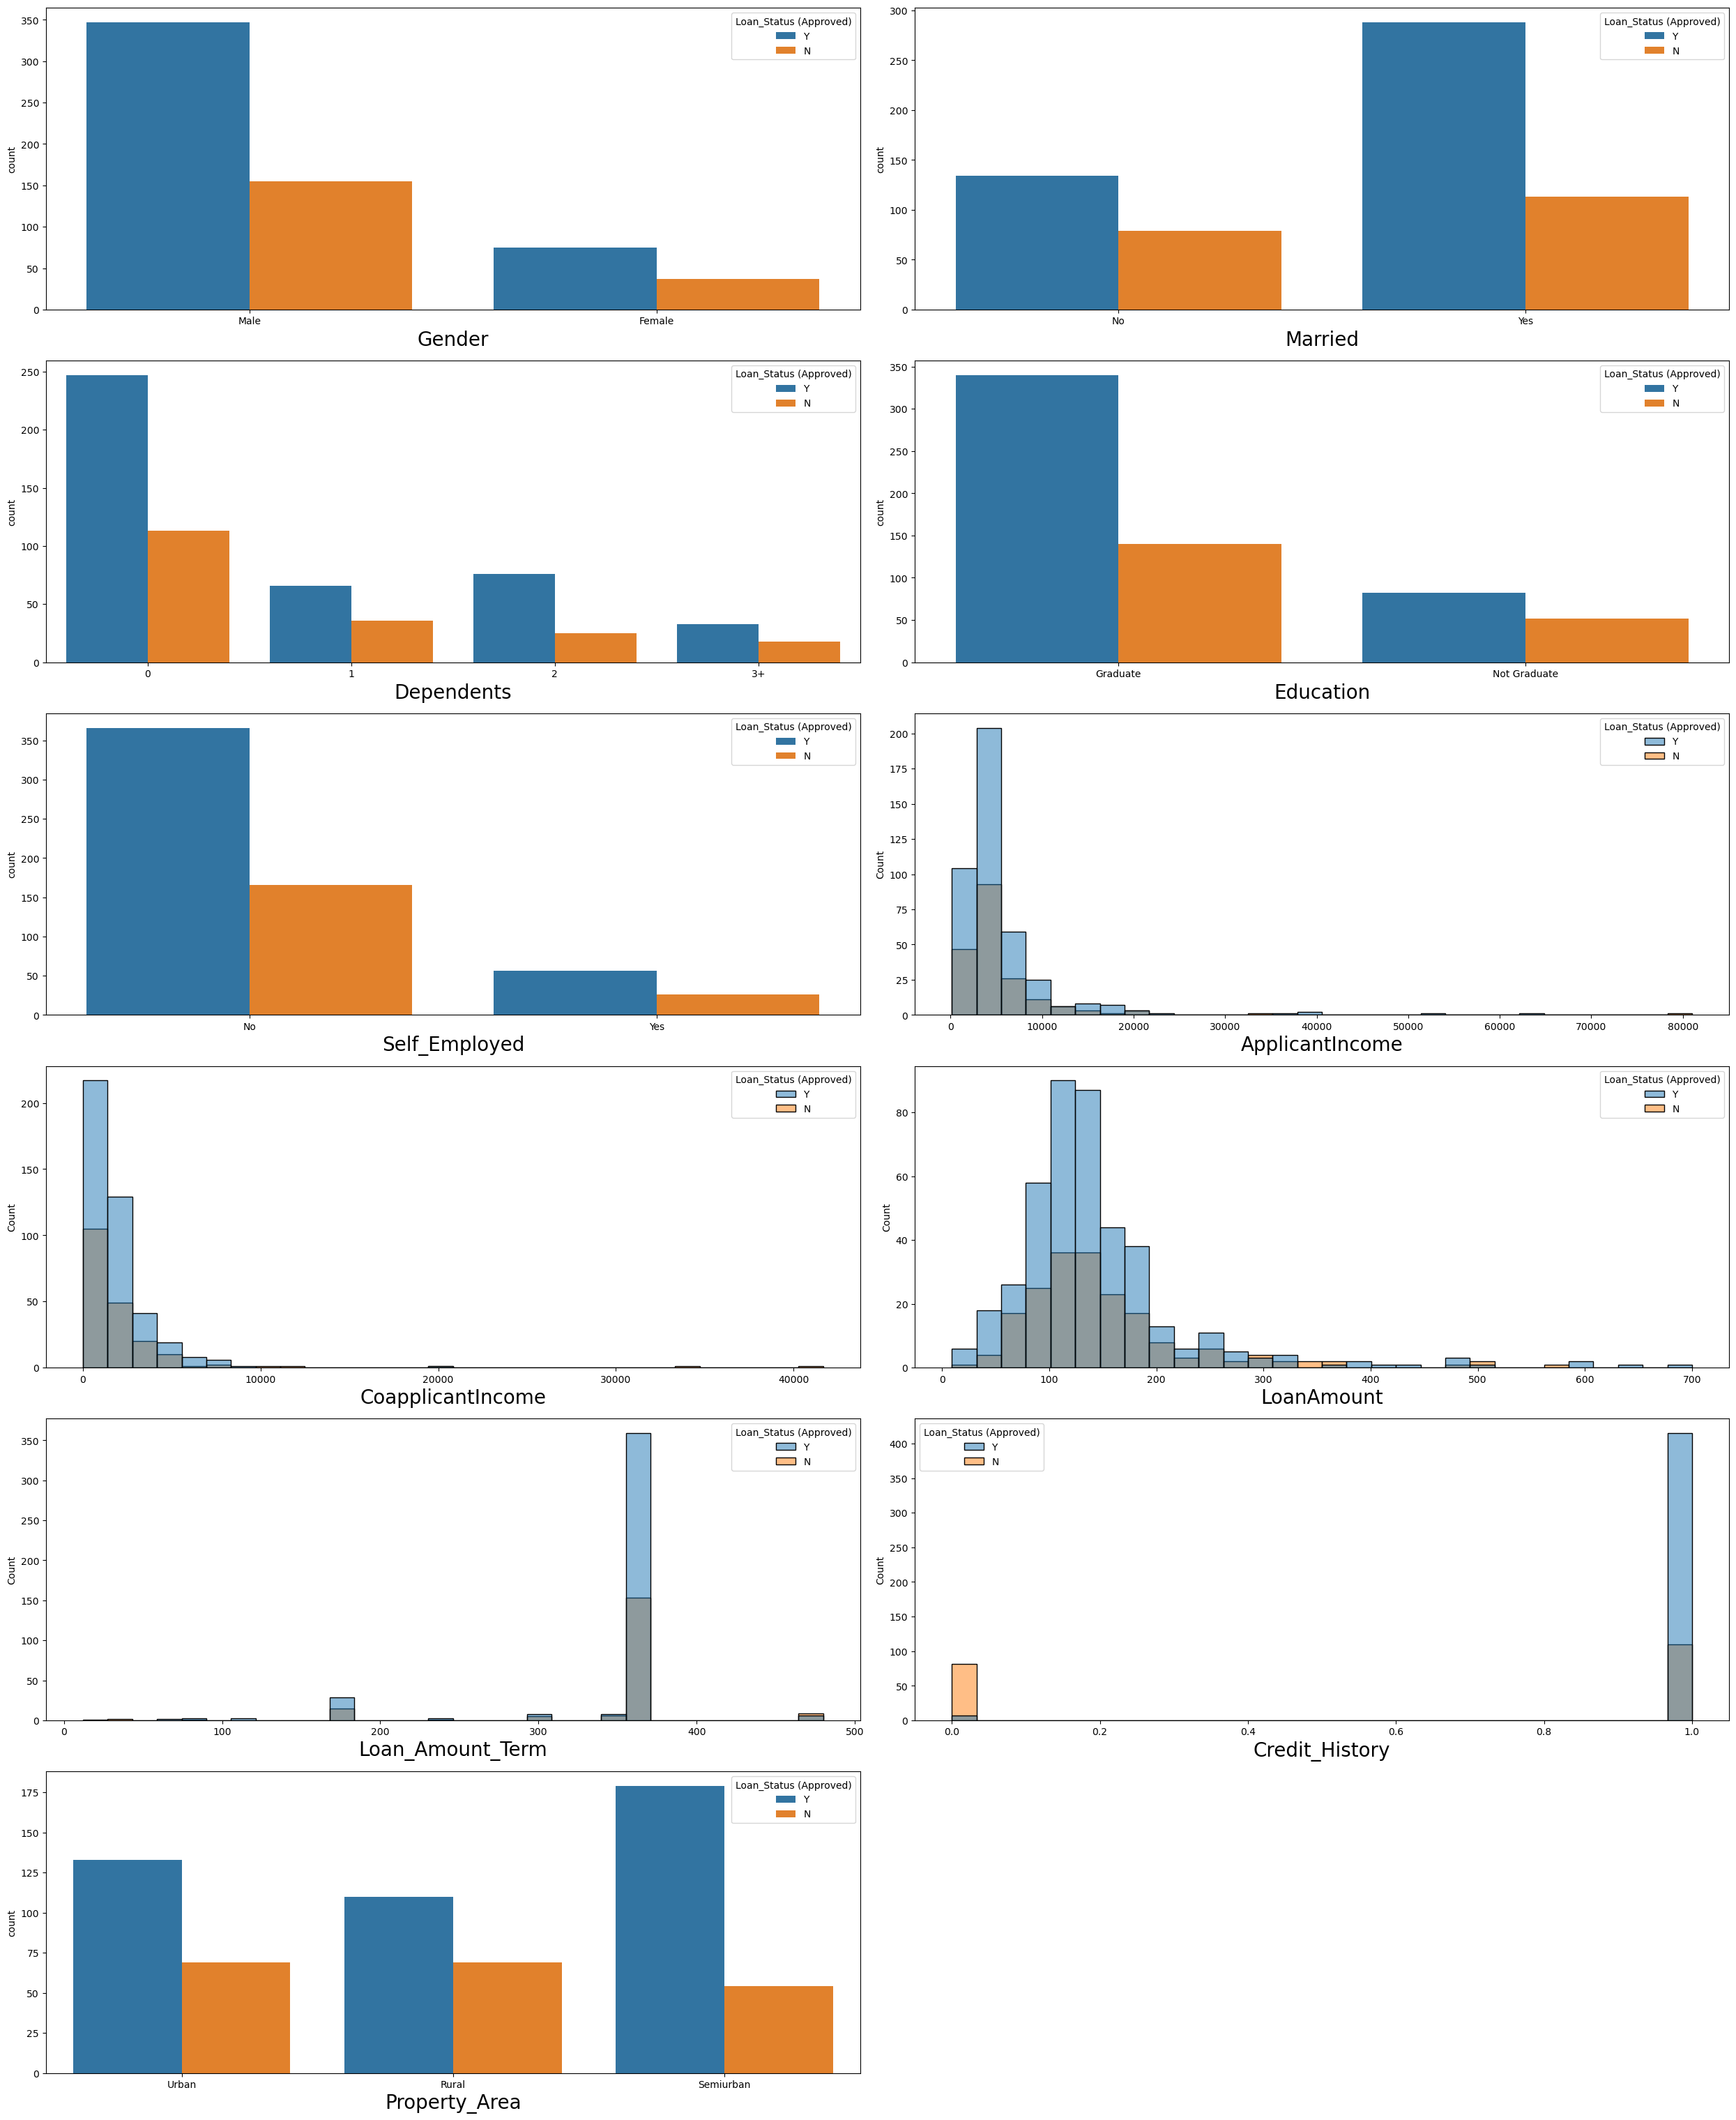

In [14]:
n = 1
plt.figure(figsize=(25, 35))
for i in df.drop(columns= ['Loan_Status (Approved)']).columns:
    if n <= len(df.columns):
        ax = plt.subplot(7, 2, n)
        if df[i].dtype == 'object':   # categorical
            sns.countplot(data=df, x=i, hue='Loan_Status (Approved)', ax=ax)
        else:                           # numerical
            sns.histplot(data=df, x=i, hue='Loan_Status (Approved)', bins=30, kde=False, ax=ax)
    n += 1
    ax.set_xlabel(i, fontsize=20)
plt.tight_layout()

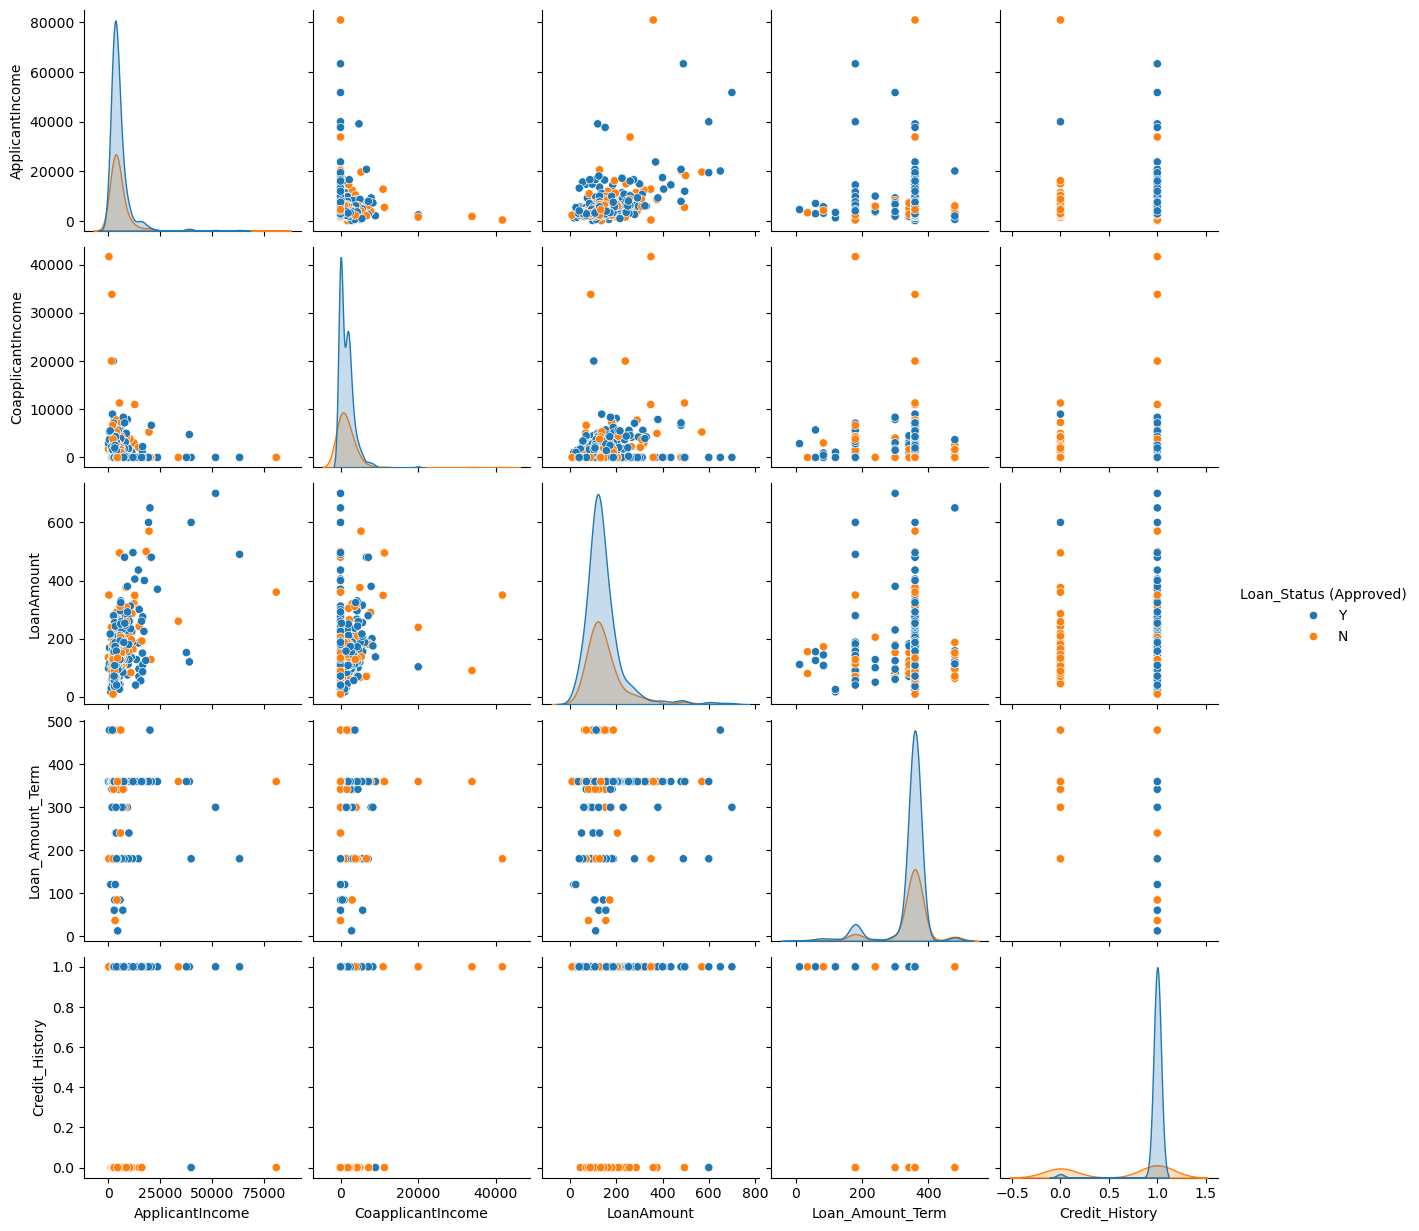

In [15]:
sns.pairplot(data=df, hue='Loan_Status (Approved)')
plt.show()

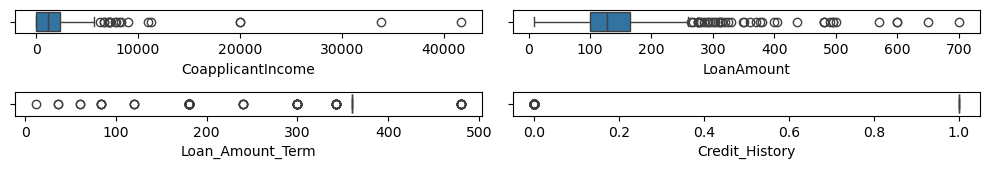

In [16]:
n = 1
plt.figure(figsize=(10, 3))
for i in df.columns:
    if df[i].dtype == 'float64':
        if n <= 4:
            ax = plt.subplot(4, 2, n)
            sns.boxplot(x=df[i])
        n += 1
plt.tight_layout()

In [17]:
df['CoapplicantIncome'] = np.log1p(df['CoapplicantIncome'])
df['ApplicantIncome'] = np.log1p(df['ApplicantIncome'])
df['LoanAmount'] = np.log1p(df['LoanAmount'])

In [18]:
# encoding the data
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()
df['Married'] = lc.fit_transform(df['Married'])
df['Dependents'] = lc.fit_transform(df['Dependents'])
df['Education'] = lc.fit_transform(df['Education'])
df['Self_Employed'] = lc.fit_transform(df['Self_Employed'])
df['Property_Area'] = lc.fit_transform(df['Property_Area'])
df['Loan_Status (Approved)'] = lc.fit_transform(df['Loan_Status (Approved)'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Gender                  614 non-null    object 
 1   Married                 614 non-null    int64  
 2   Dependents              614 non-null    int64  
 3   Education               614 non-null    int64  
 4   Self_Employed           614 non-null    int64  
 5   ApplicantIncome         614 non-null    float64
 6   CoapplicantIncome       614 non-null    float64
 7   LoanAmount              614 non-null    float64
 8   Loan_Amount_Term        614 non-null    float64
 9   Credit_History          614 non-null    float64
 10  Property_Area           614 non-null    int64  
 11  Loan_Status (Approved)  614 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 57.7+ KB


In [20]:
# one hot encoding on gender column as its a nominal data
df = pd.get_dummies(df, columns=['Gender'], drop_first=True, dtype=int)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Married                 614 non-null    int64  
 1   Dependents              614 non-null    int64  
 2   Education               614 non-null    int64  
 3   Self_Employed           614 non-null    int64  
 4   ApplicantIncome         614 non-null    float64
 5   CoapplicantIncome       614 non-null    float64
 6   LoanAmount              614 non-null    float64
 7   Loan_Amount_Term        614 non-null    float64
 8   Credit_History          614 non-null    float64
 9   Property_Area           614 non-null    int64  
 10  Loan_Status (Approved)  614 non-null    int64  
 11  Gender_Male             614 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


In [22]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Gender_Male
0,0,0,0,0,8.674197,0.000000,4.859812,360.0,1.0,2,1,1
1,1,1,0,0,8.430327,7.319202,4.859812,360.0,1.0,0,0,1
2,1,0,0,1,8.006701,0.000000,4.204693,360.0,1.0,2,1,1
3,1,0,1,0,7.857094,7.765993,4.795791,360.0,1.0,2,1,1
4,0,0,0,0,8.699681,0.000000,4.955827,360.0,1.0,2,1,1


In [23]:
# scaling
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']] = scale.fit_transform(df[['ApplicantIncome', 
                                                                            'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']])

In [24]:
df.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved),Gender_Male
0,0,0,0,0,0.581854,0.000000,0.601711,0.74359,1.0,2,1,1
1,1,1,0,0,0.543052,0.688057,0.601711,0.74359,1.0,0,0,1
2,1,0,0,1,0.475649,0.000000,0.447563,0.74359,1.0,2,1,1
3,1,0,1,0,0.451844,0.730059,0.586647,0.74359,1.0,2,1,1
4,0,0,0,0,0.585909,0.000000,0.624304,0.74359,1.0,2,1,1


### Feature Engineering

In [25]:
df_num = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]
df_num.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
ApplicantIncome,1.000000,-0.368258,0.492819,-0.030741
CoapplicantIncome,-0.368258,1.000000,0.132697,0.013613
LoanAmount,0.492819,0.132697,1.000000,0.086618
Loan_Amount_Term,-0.030741,0.013613,0.086618,1.000000


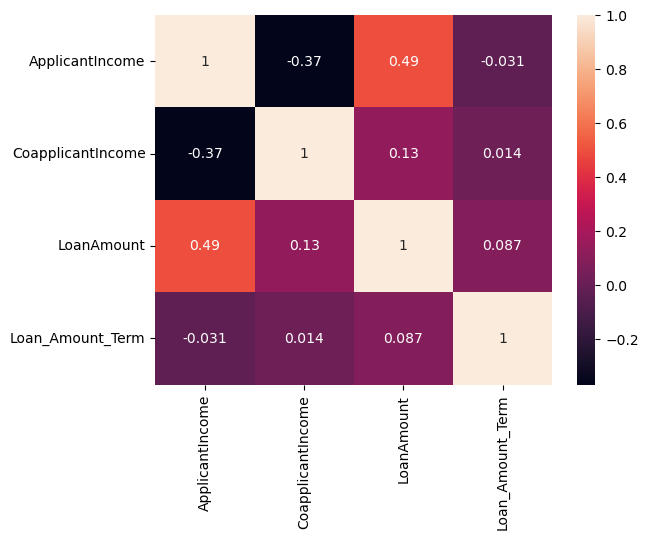

In [26]:
sns.heatmap(data= df_num.corr(), annot=True)
plt.show()

In [27]:
df_num.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,0.528920,0.403303,0.603189,0.705128
std,0.102632,0.364360,0.115487,0.137548
min,0.000000,0.000000,0.000000,0.000000
25%,0.469017,0.000000,0.544715,0.743590
50%,0.513772,0.665676,0.601711,0.743590
75%,0.580379,0.727606,0.660693,0.743590
max,1.000000,1.000000,1.000000,1.000000


### Model Creation

In [28]:
# define x, y
x = df.drop(columns=['Loan_Status (Approved)'])
y = df['Loan_Status (Approved)']

In [29]:
# train test split
from sklearn.model_selection import train_test_split
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size= 0.25, random_state=42)

In [30]:
y_test.value_counts()

Loan_Status (Approved)
1    322
0    138
Name: count, dtype: int64

In [31]:
# balancing the data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

In [32]:
x_smote, y_smote = smote.fit_resample(x_train, y_train)

In [33]:
y_smote.value_counts()

Loan_Status (Approved)
1    100
0    100
Name: count, dtype: int64

In [34]:
# Model Training
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(x_smote, y_smote)

SVC(random_state=42)

In [35]:
y_pred = svc.predict(x_test)
y_pred

array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [36]:
# Evaluationg the model
from sklearn.metrics import accuracy_score, classification_report, f1_score
acc = accuracy_score(y_test, y_pred)
acc

0.7717391304347826

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.49      0.56       138
           1       0.80      0.89      0.85       322

    accuracy                           0.77       460
   macro avg       0.73      0.69      0.70       460
weighted avg       0.76      0.77      0.76       460



In [38]:
f1 = f1_score(y_test, y_pred)
print(f1)

0.8458149779735683


In [39]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc, x, y, cv=3, scoring='f1')
print(f'scores : {scores}')
print(f'cross validating scores mean : {scores.mean()}')
print(f'cross validating scores std : {scores.std()}')

scores : [0.87066246 0.86875    0.89032258]
cross validating scores mean : 0.8765783470709949
cross validating scores std : 0.0097499519233619


In [40]:
cm1 = pd.crosstab(y_test, y_pred)
cm1

col_0,0,1
Loan_Status (Approved),,
0,67,71
1,34,288


### Hyperparameter tuning the model

In [41]:
from sklearn.model_selection import GridSearchCV
param = {'C': [0.1, 1, 10, 100, 1000],
        'gamma' : [1, 0.1, 0.01, 0.001, 0.0001]}
grid = GridSearchCV(SVC(random_state=42), param_grid= param, verbose=1, scoring='f1', cv=3)
grid.fit(x_smote, y_smote)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             scoring='f1', verbose=1)

In [42]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.1}


In [43]:
print(grid.best_estimator_)

SVC(C=1, gamma=0.1, random_state=42)


In [44]:
print(grid.best_score_)

0.7695224671968859


In [45]:
clf = SVC(C=1, gamma=0.1, random_state=42)

In [46]:
clf.fit(x_smote, y_smote)

SVC(C=1, gamma=0.1, random_state=42)

In [47]:
y_clf = clf.predict(x_test)

In [48]:
print('Before hypertuning is')
print(cm1)
print('\nAfter hypertuning is')
print(pd.crosstab(y_test, y_clf))

Before hypertuning is
col_0                    0    1
Loan_Status (Approved)         
0                       67   71
1                       34  288

After hypertuning is
col_0                    0    1
Loan_Status (Approved)         
0                       62   76
1                        7  315


In [50]:
print('Before hypertuning is')
print(classification_report(y_test, y_pred))
print('\nAfter hypertuning is')
print(classification_report(y_test, y_clf))

Before hypertuning is
              precision    recall  f1-score   support

           0       0.66      0.49      0.56       138
           1       0.80      0.89      0.85       322

    accuracy                           0.77       460
   macro avg       0.73      0.69      0.70       460
weighted avg       0.76      0.77      0.76       460


After hypertuning is
              precision    recall  f1-score   support

           0       0.90      0.45      0.60       138
           1       0.81      0.98      0.88       322

    accuracy                           0.82       460
   macro avg       0.85      0.71      0.74       460
weighted avg       0.83      0.82      0.80       460



In [51]:
print('Before hypertuning is')
print(acc)
print('\nAfter hypertuning is')
print(accuracy_score(y_test, y_clf))

Before hypertuning is
0.7717391304347826

After hypertuning is
0.8195652173913044


In [52]:
print('Before hypertuning is')
print(f1)
print('\nAfter hypertuning is')
print(f1_score(y_test, y_clf))

Before hypertuning is
0.8458149779735683

After hypertuning is
0.8835904628330996


### Conclustion
#### After applying hyperparameter tuning to the Support Vector Classifier (SVC), the model showed a clear and meaningful improvement in overall performance on the loan approval dataset.
#### Accuracy improved from ~77.7% to ~81.9%, indicating better generalization on unseen data.
#### F1-score increased (from ~0.85 to ~0.88), showing a stronger balance between precision and recall after tuning.
#### The tuned model achieved much higher recall for approved loans (Class 1), which is critical in real-world loan approval systems where missing eligible customers can lead to lost business opportunities.
#### While recall for rejected loans (Class 0) decreased slightly, the model now prioritizes correctly identifying eligible applicants, which aligns well with business goals for customer acquisition.
#### Overall, hyperparameter tuning significantly enhanced the SVC model’s effectiveness, making it a more reliable baseline classifier for loan approval prediction. With further improvements such as class balancing, feature engineering, and threshold optimization, this model can be extended into a robust end-to-end loan approval decision system suitable for real-world deployment.